# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

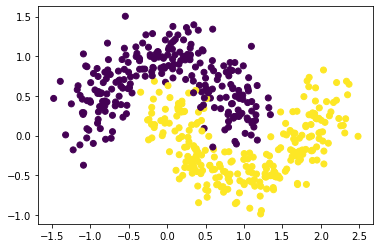

In [5]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [20]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.9 MB/s eta 0:00:00a 0:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.gridspec as gridspec
import itertools
from sklearn import metrics as skl_metrics
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


lg = LogisticRegression(penalty='l2', solver='saga', tol=1e-3,max_iter=500) #task 2
svm = SVC(kernel='linear',max_iter=500)

In [2]:
def plot_decisions(models_list, models_names, X, y, figsize=(10, 8), dpi=100):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize, dpi=dpi)

    for i, (clf, lab) in enumerate(zip(models_list, models_names)):
        clf.fit(X, y)
        ax = axes[i // 2][i % 2]
        plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=ax)
        ax.set_title(lab)

    plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moons_points,moons_labels, test_size = 0.3)

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  if kernel == "precomputed":


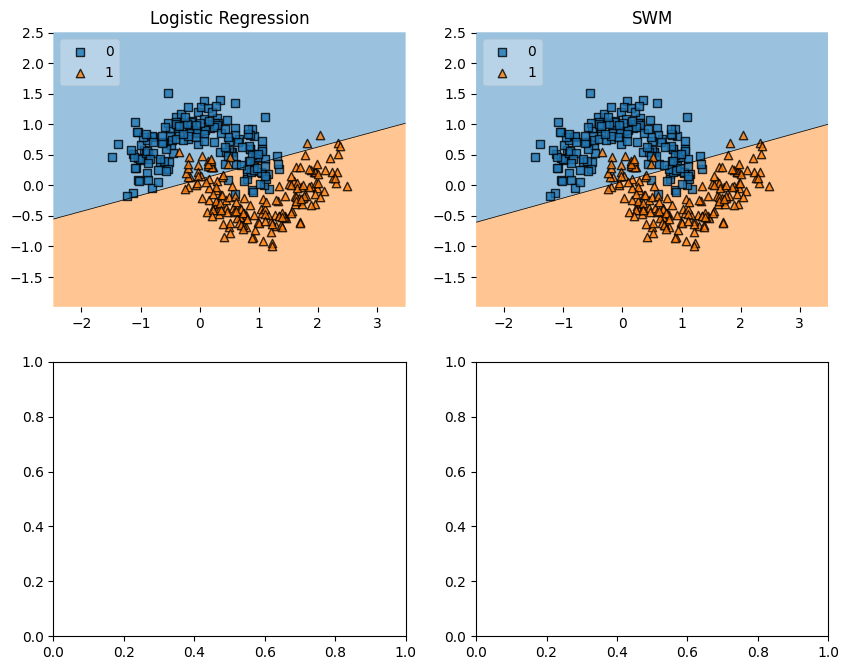

In [50]:
plot_decisions([lg, svm], ['Logistic Regression', 'SWM'], X_train, y_train)


In [51]:
print('f1 on LR: ', skl_metrics.f1_score(y_test, lg.predict(X_test),average='weighted'))
print('f1 on SVM: ', skl_metrics.f1_score(y_test, svm.predict(X_test),average='weighted'))

f1 on LR:  0.8732488550975946
f1 on SVM:  0.8596071444479088


Результаты схожи

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  if kernel == "precomputed":
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  if kernel == "precomputed":


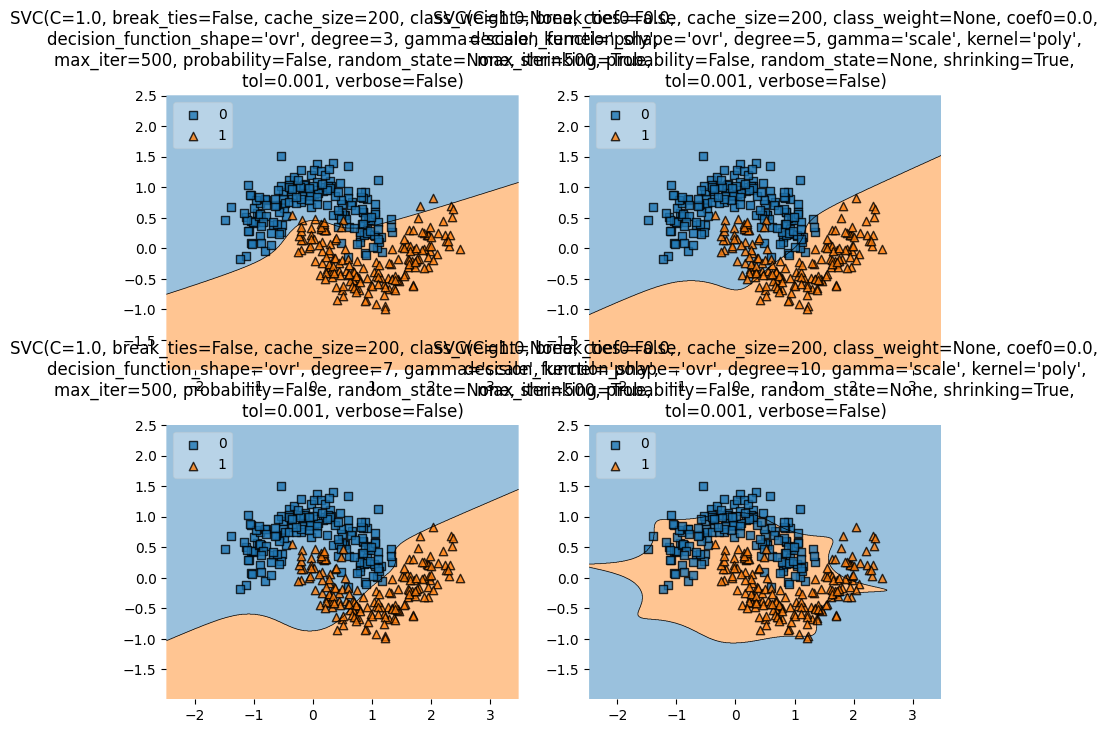

In [71]:
svm_poly_3 = SVC(kernel='poly',max_iter=500, degree=3)
svm_poly_5 = SVC(kernel='poly',max_iter=500, degree=5)
svm_poly_7 = SVC(kernel='poly',max_iter=500, degree=7)
svm_poly_10 = SVC(kernel='poly',max_iter=500, degree=10)
models = [svm_poly_3, svm_poly_5,  svm_poly_7, svm_poly_10]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train, y_train)

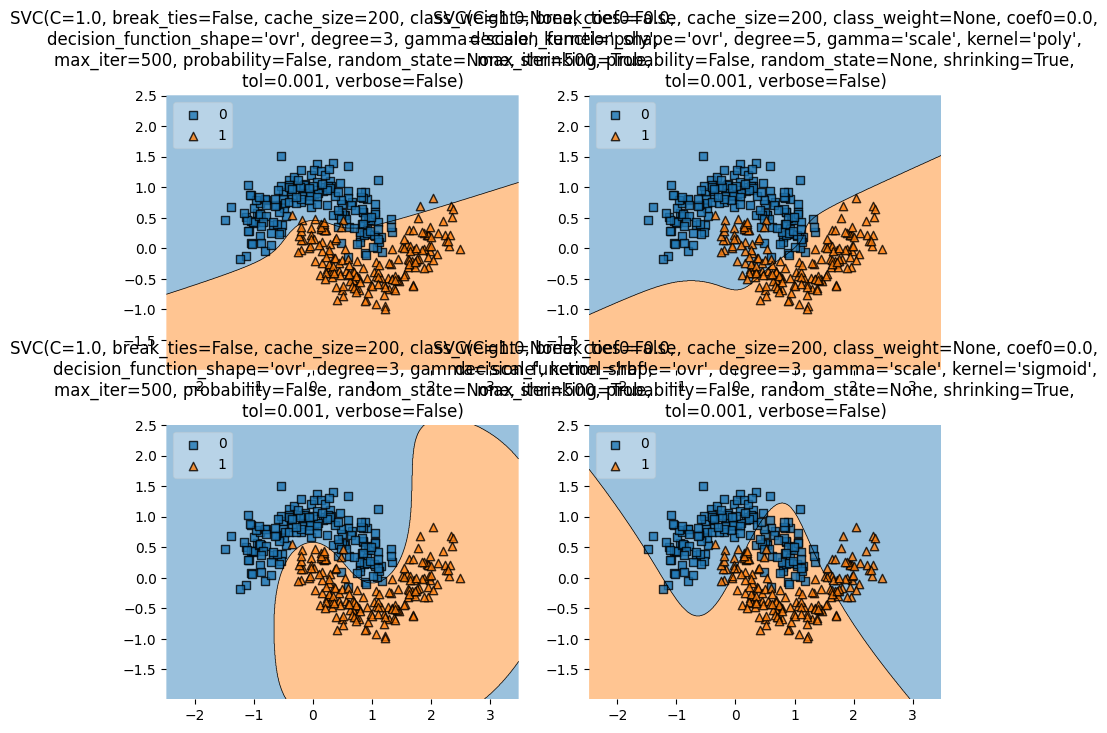

In [72]:
svm_rbf = SVC(kernel='rbf',max_iter=500)
svm_sigmoid = SVC(kernel='sigmoid',max_iter=500)


models = [svm_poly_3, svm_poly_5,  svm_rbf, svm_sigmoid]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train, y_train)

In [75]:
print('f1 on svm_poly: ', skl_metrics.f1_score(y_test, svm_poly_3.predict(X_test),average='weighted'))
print('f1 on svm_poly_5: ', skl_metrics.f1_score(y_test, svm_poly_5.predict(X_test),average='weighted'))
print('f1 on svm_rbf: ', skl_metrics.f1_score(y_test, svm_rbf.predict(X_test),average='weighted'))
print('f1 on svm_sigmoid: ', skl_metrics.f1_score(y_test, svm_sigmoid.predict(X_test),average='weighted'))

f1 on svm_poly:  0.9066666666666666
f1 on svm_poly_5:  0.8433093068588785
f1 on svm_rbf:  0.9733238501659556
f1 on svm_sigmoid:  0.6258689458689459


качество классификации повысилось на rbf и poly_3
на граница уже нелинейная
Лучше всего показал rbf

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=2 ,interaction_only=True)

X_train_pol = pol.fit_transform(X_train)
X_test_pol = pol.transform(X_test)

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


ValueError: Filler values must be provided when X has more than 2 training features.

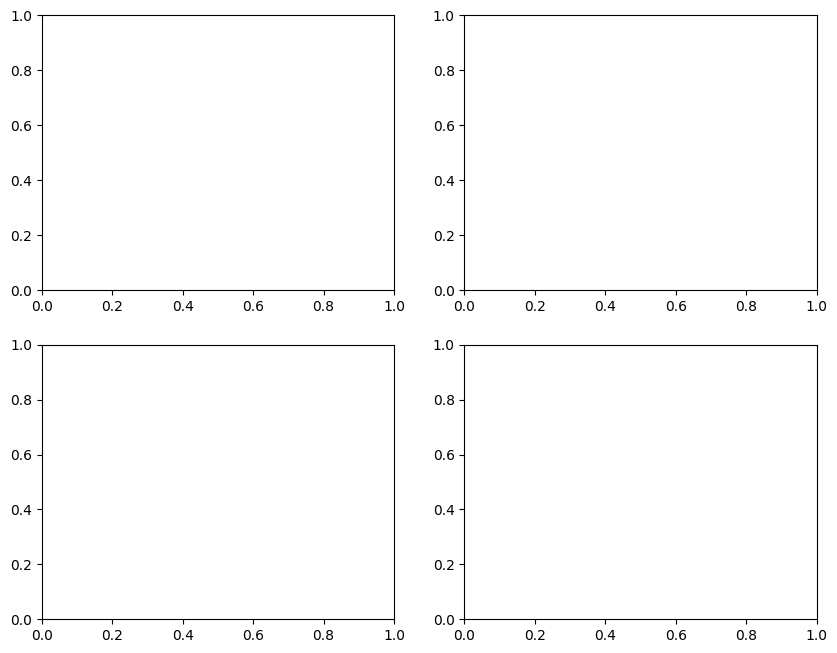

In [9]:
lg = LogisticRegression(penalty='l2', solver='saga', tol=1e-3,max_iter=500)  #task2
svm = SVC(kernel='linear',max_iter=500) #task2

lg.fit(X_train_pol, y_train)
svm.fit(X_train_pol, y_train)

plot_decisions([lg, svm], ['Logistic Regression', 'SWM'], X_train_pol, y_train)

In [8]:
y_test.shape, y_train.shape, X_test_pol.shape, X_test.shape

((150,), (350,), (150, 4), (150, 2))

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

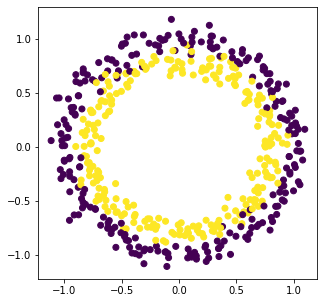

In [22]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

In [23]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(circles_points,circles_labels, test_size = 0.3)


And even more:

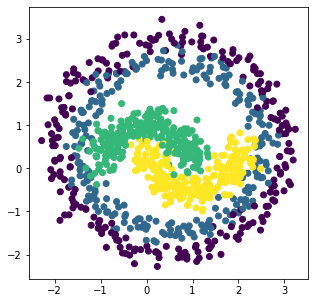

In [24]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

In [25]:
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(points,labels, test_size = 0.3)






Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


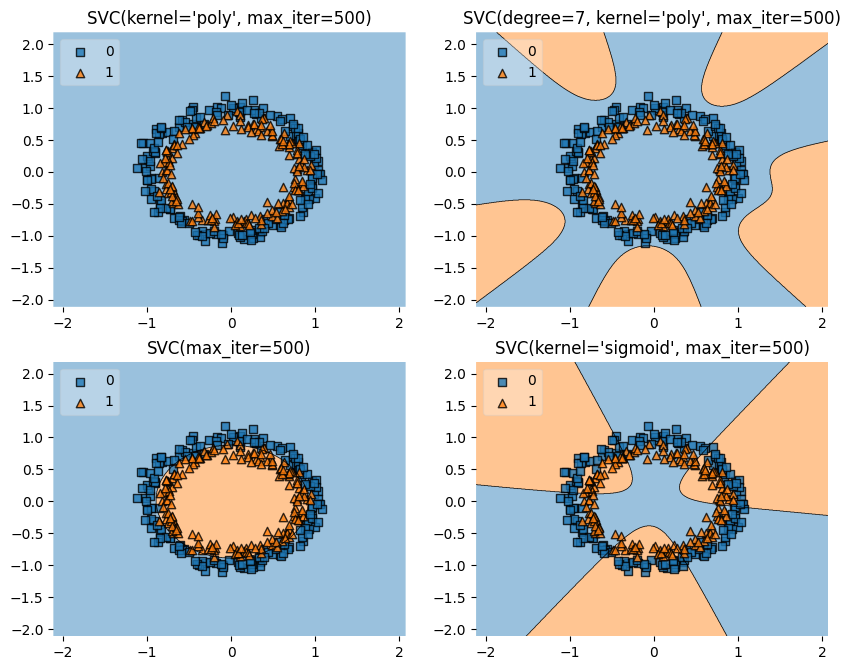

In [29]:
svm_poly = SVC(kernel='poly',max_iter=500)
svm_poly_7 = SVC(kernel='poly',max_iter=500, degree=7)
svm_rbf = SVC(kernel='rbf',max_iter=500)
svm_sigmoid = SVC(kernel='sigmoid',max_iter=500)


models = [ svm_poly, svm_poly_7, svm_rbf, svm_sigmoid]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train_s, y_train_s)

In [30]:
print('f1 on svm_poly: ', skl_metrics.f1_score(y_test_s, svm_poly.predict(X_test_s),average='weighted'))
print('f1 on svm_poly_7: ', skl_metrics.f1_score(y_test_s, svm_poly_7.predict(X_test_s),average='weighted'))
print('f1 on svm_rbf: ', skl_metrics.f1_score(y_test_s, svm_rbf.predict(X_test_s),average='weighted'))
print('f1 on svm_sigmoid: ', skl_metrics.f1_score(y_test_s, svm_sigmoid.predict(X_test_s),average='weighted'))

f1 on svm_poly:  0.296969696969697
f1 on svm_poly_7:  0.296969696969697
f1 on svm_rbf:  0.9134143987647172
f1 on svm_sigmoid:  0.4571377666919068


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:352: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:352: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the e

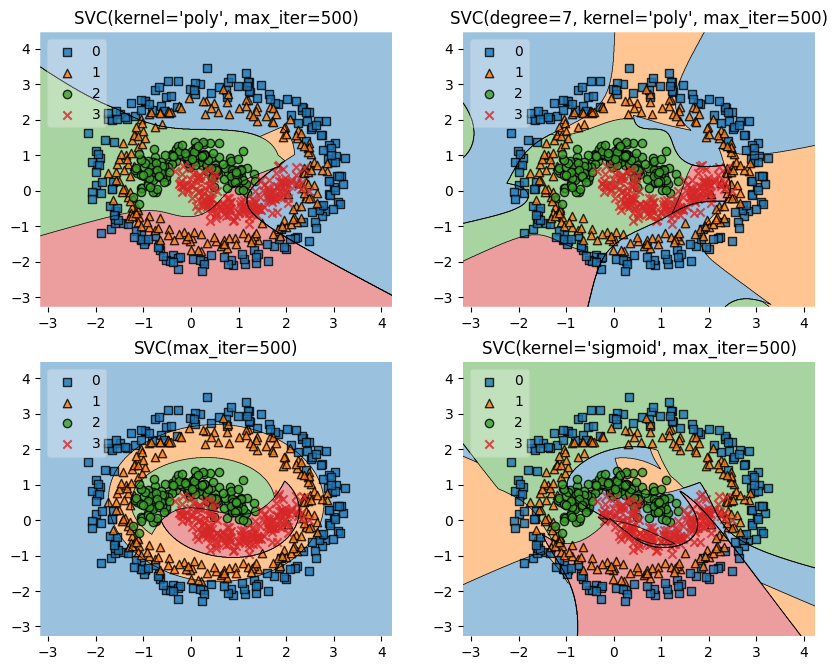

In [31]:
svm_poly = SVC(kernel='poly',max_iter=500)
svm_poly_7 = SVC(kernel='poly',max_iter=500, degree=7)
svm_rbf = SVC(kernel='rbf',max_iter=500)
svm_sigmoid = SVC(kernel='sigmoid',max_iter=500)


models = [ svm_poly, svm_poly_7, svm_rbf, svm_sigmoid]
labels = [str(i) for i in models]
plot_decisions(models, labels, X_train_s2, y_train_s2)

In [32]:
print('f1 on svm_poly: ', skl_metrics.f1_score(y_test_s2, svm_poly.predict(X_test_s2),average='weighted'))
print('f1 on svm_poly_7: ', skl_metrics.f1_score(y_test_s2, svm_poly_7.predict(X_test_s2),average='weighted'))
print('f1 on svm_rbf: ', skl_metrics.f1_score(y_test_s2, svm_rbf.predict(X_test_s2),average='weighted'))
print('f1 on svm_sigmoid: ', skl_metrics.f1_score(y_test_s2, svm_sigmoid.predict(X_test_s2),average='weighted'))

f1 on svm_poly:  0.35524251511911026
f1 on svm_poly_7:  0.5677499948211066
f1 on svm_rbf:  0.8968107950547423
f1 on svm_sigmoid:  0.11268208782673789


Вывод - в этой задаче svm_rbf лучше остальных классификацией данных